## IMPLEMENTING A SIMPLIFIED ATTENTION MECHANISM

<div class="alert alert-block alert-success">

Consider the following input sentence, which has already been embedded into 3-
dimensional vectors. 

We choose a small embedding dimension for
illustration purposes to ensure it fits on the page without line breaks:

</div>

In [27]:
import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

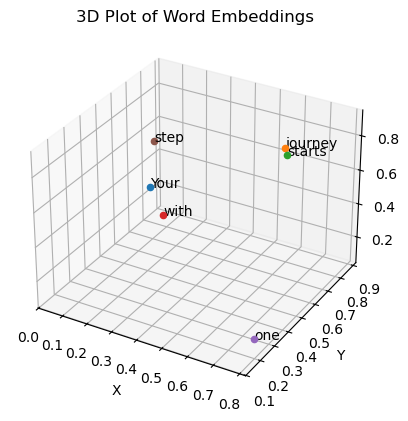

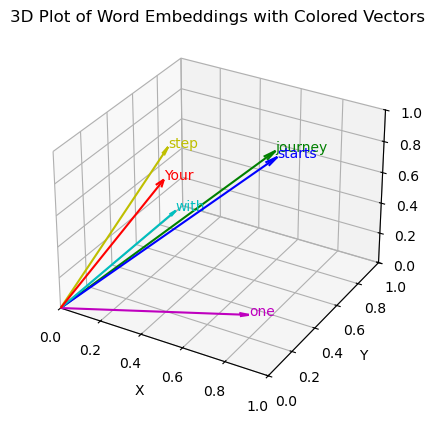

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs2 = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

# Corresponding words
words2 = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs2[:, 0].numpy()
y_coords = inputs2[:, 1].numpy()
z_coords = inputs2[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words2):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words2, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

<div class="alert alert-block alert-info">
    
The second input token serves as the query    
</div>

In [29]:
query=inputs[2]
ans=torch.empty(inputs.shape[0])
for i in range(len(inputs)):
    x_i=inputs[i]
    ans[i]=torch.dot(x_i,query)
print(ans)

tensor([0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605])


In [30]:
attention_weight=ans/ans.sum()
print(attention_weight)

tensor([0.1454, 0.2277, 0.2248, 0.1280, 0.1104, 0.1637])


In [31]:
attention_score2=torch.softmax(ans,dim=-1)
print(attention_score2)
print(attention_score2.sum())

tensor([0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565])
tensor(1.0000)


In [32]:
query=inputs[2]
context_vector2=torch.zeros(inputs.shape[1])
print(context_vector2.shape)
for i in range(len(inputs)):
    
    x_i=inputs[i]
    context_vector2+=attention_score2[i]*x_i
print(context_vector2)

torch.Size([3])
tensor([0.4431, 0.6496, 0.5671])


<div class="alert alert-block alert-success">

First, we add an additional for-loop to compute the
dot products for all pairs of inputs.

</div>

In [33]:
attn_score=torch.empty(6,6)
for i in range(len(inputs)):
    for j in range(len(inputs)):
        attn_score[i][j]=torch.dot(inputs[i],inputs[j])

print(attn_score)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


<div class="alert alert-block alert-info">
    
When computing the preceding attention score tensor, we used for-loops in Python.
                                                            
However, for-loops are generally slow, and we can achieve the same results using matrix
multiplication:
</div>

In [34]:
attn_score=inputs @ inputs.T
print(attn_score)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


<div class="alert alert-block alert-success">

We now normalize each row so that the values in
each row sum to 1:

</div>

In [35]:
attn_weight=torch.softmax(attn_score,dim=-1)
print(attn_weight)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


<div class="alert alert-block alert-success">

In the third and last step, we now use these attention weights to compute all context
vectors via matrix multiplication:

</div>

In [36]:
all_context_vecs = attn_weight @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


## IMPLEMENTING SELF ATTENTION WITH TRAINABLE WEIGHTS

<div class="alert alert-block alert-info">
    
#A The second input element

#B The input embedding size, d=3


#C The output embedding size, d_out=2

</div>

In [37]:
x_2=inputs[2]
din=inputs.shape[1]
dout=2

<div class="alert alert-block alert-info">
    
Note that in GPT-like models, the input and output dimensions are usually the same. 

But for illustration purposes, to better follow the computation, we choose different input (d_in=3)
and output (d_out=2) dimensions here.

</div>

<div class="alert alert-block alert-success">

Next, we initialize the three weight matrices Wq, Wk and Wv

</div>

In [38]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(din, dout), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(din, dout), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(din, dout), requires_grad=False)

In [39]:
print(W_query)
print(W_key)
print(W_value)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [40]:
keys=inputs @ W_key
query=inputs @ W_query
value=inputs @ W_value
print("keys.shape:", keys.shape)

print("values.shape:", value.shape)

print("queries.shape:", query.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
queries.shape: torch.Size([6, 2])


In [41]:
attn_score=query @ keys.T 
print(attn_score)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


<div class="alert alert-block alert-success">
    
We compute the attention weights by scaling the
attention scores and using the softmax function we used earlier. 

The difference to earlier is
that we now scale the attention scores by dividing them by the square root of the
embedding dimension of the keys. 

Note that taking the square root is mathematically the
same as exponentiating by 0.5:</div>

## WHY DIVIDE BY SQRT (DIMENSION)

<div class="alert alert-block alert-warning">

Reason 1: For stability in learning

The softmax function is sensitive to the magnitudes of its inputs. When the inputs are large, the differences between the exponential values of each input become much more pronounced. This causes the softmax output to become "peaky," where the highest value receives almost all the probability mass, and the rest receive very little.

In attention mechanisms, particularly in transformers, if the dot products between query and key vectors become too large (like multiplying by 8 in this example), the attention scores can become very large. This results in a very sharp softmax distribution, making the model overly confident in one particular "key." Such sharp distributions can make learning unstable,
    
</div>

<div class="alert alert-block alert-warning">

Reason 2: To make the variance of the dot product stable

The dot product of  Q and K increases the variance because multiplying two random numbers increases the variance.

The increase in variance grows with the dimension. 

Dividing by sqrt (dimension) keeps the variance close to 1
    
</div>

In [42]:
attn_weight=torch.softmax(attn_score,dim=-1)
print(attn_weight)

tensor([[0.1484, 0.2285, 0.2217, 0.1301, 0.0883, 0.1831],
        [0.1401, 0.2507, 0.2406, 0.1157, 0.0687, 0.1842],
        [0.1406, 0.2496, 0.2397, 0.1164, 0.0696, 0.1841],
        [0.1548, 0.2130, 0.2083, 0.1394, 0.1047, 0.1799],
        [0.1577, 0.2067, 0.2028, 0.1428, 0.1122, 0.1777],
        [0.1494, 0.2267, 0.2202, 0.1310, 0.0901, 0.1825]])


In [43]:
all_context_vecs = attn_weight @ inputs
print(all_context_vecs)

tensor([[0.4216, 0.6534, 0.5772],
        [0.4228, 0.6753, 0.5905],
        [0.4228, 0.6742, 0.5899],
        [0.4227, 0.6365, 0.5670],
        [0.4238, 0.6290, 0.5627],
        [0.4218, 0.6514, 0.5762]])
